<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from palmerpenguins import load_penguins

In [ ]:
pip install palmerpenguins

In [ ]:
penguins = load_penguins()
df = penguins.dropna()

In [ ]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['species'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

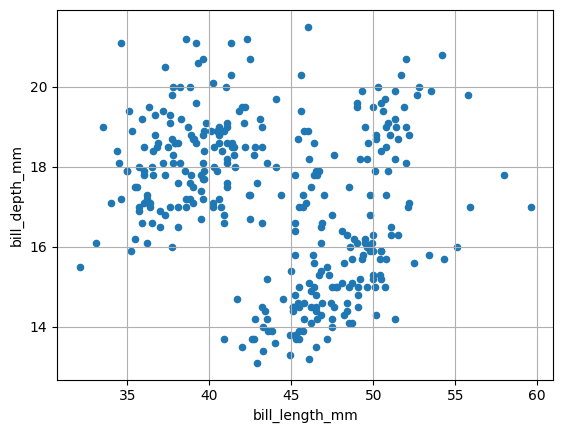

In [ ]:
df.plot(kind='scatter', grid=True, x='bill_length_mm', y='bill_depth_mm')

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_new = [[50, 17, 400, 2000]]
print(model.predict(X_new))

['Adelie']


BINARY CLASSIFIER

In [ ]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df_binary = df[df['species'].isin(['Adelie', 'Gentoo'])]
X = df_binary[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df_binary['species'].values

In [ ]:
y = (y == 'Gentoo').astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_logreg = logreg.predict(X_test_scaled)

In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")


Logistic Regression Accuracy: 100.00%


In [ ]:
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [ ]:
print(confusion_matrix(y_test, y_pred_logreg))

[[33  0]
 [ 0 20]]


In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 100.00%


In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

[[33  0]
 [ 0 20]]


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



Stochastic Gradient Descent

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [9]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

In [10]:
penguins = penguins.dropna()
X = penguins[['flipper_length_mm']].values
y = penguins[['body_mass_g']].values

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
n_epochs = 50
t0, t1 = 5, 50
m = X_b.shape[0]

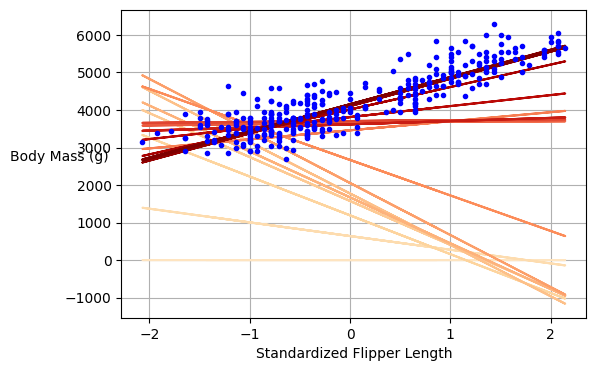

Final theta values: [[4209.10943512]
 [ 713.44295216]]


In [14]:
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

theta_path_sgd = []

plt.figure(figsize=(6, 4))

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_b @ theta
            color = plt.cm.OrRd(iteration / n_shown + 0.15)
            plt.plot(X_scaled, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

        theta_path_sgd.append(theta)

plt.plot(X_scaled, y, "b.")
plt.xlabel("Standardized Flipper Length")
plt.ylabel("Body Mass (g)", rotation=0)
plt.grid()
plt.show()

print("Final theta values:", theta)